# MARATONA BEHIND THE CODE 2020

## DESAFIO 4: ALGAR

## Testes com modelo LightGBM
- Autor: Rodrigo Lima
- LinkedIN: https://www.linkedin.com/in/rodrigolima82/


![title](rh_analytics2.png)

# Parte 01. Importando as bibliotecas

In [12]:
# Pacotes padrao
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

# Pacote do sklearn
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Pacote imblearn
import imblearn
from imblearn.over_sampling import SMOTE

# Pacote LOFO para Feature Importance
from lofo import LOFOImportance, Dataset, plot_importance

# Pacote para hyperparametros
#import optuna

# Desativando warnings no jupyter
import warnings
warnings.filterwarnings('ignore')

# Configurando o output no Jupyter
pd.options.display.max_seq_items = 8000
pd.options.display.max_columns = 1000
pd.options.display.max_rows    = 1000
pd.set_option('display.max_columns', None)


In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "IBM Desafio 4 - Algar" --iversions

imblearn         0.6.2
matplotlib.pylab 1.18.2
pandas_profiling 2.8.0
numpy            1.18.2
pandas           0.25.3
seaborn          0.10.0
IBM Desafio 4 - Algar


# Parte 02. Carregando o Dataset

In [3]:
# Carregando o dataset da competição
dados = pd.read_csv('../data/algar-dataset-treino.csv')

# Visualizando os primeiros registros
dados.head()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,Genero,Horas voluntariado,Envolvimento com trabalho,Posicao,Cargo,Satisfação com emprego,Estado civil,Renda,Bonus de performance,Quantidade de empresas que trabalho,Maior de idade,Necessita de hora extra,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
0,49,Cliente,279,Engenharia,8,Médio completo,Ciências das natureza,1,2,3,M,61,2,2,Engenheiro,2,Casado,5130,24907,1,1,Não,23,4,4,80,1,10,3,3,10,7,1,7,Não
1,33,Misto,1392,Engenharia,3,Superior incompleto - cursando,Ciências das natureza,1,5,4,F,56,3,1,Engenheiro,3,Casado,2909,23159,1,1,Sim,11,3,3,80,0,8,3,3,8,7,3,0,Não
2,27,Cliente,591,Engenharia,2,Médio completo,Medicina,1,7,1,M,40,3,1,Tecnico,2,Casado,3468,16632,9,1,Não,12,3,4,80,1,6,3,3,2,2,2,2,Não
3,32,Misto,1005,Engenharia,2,Superior incompleto,Ciências das natureza,1,8,4,M,79,3,1,Tecnico,4,Solteiro,3068,11864,0,1,Não,13,3,3,80,0,8,2,2,7,7,3,6,Não
4,59,Misto,1324,Engenharia,3,Superior completo,Medicina,1,10,3,F,81,4,1,Tecnico,1,Casado,2670,9964,4,1,Sim,20,4,1,80,3,12,3,2,1,0,0,0,Não


# Parte 03. EDA (Análise Exploratória dos Dados)
> Nesta fase estou usando a biblioteca **Pandas Profile** pois automatiza o processo e nos traz uma visão geral do dataset
> Para mais detalhes, segue link da documentação: https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html

### Dicionário de dados


- **Idade**       - XXXX
- **Local de trabalho**       - XXXX
- **Pontuação teste**       - XXXX
- **Departmento**       - XXXX
- **Distancia casa-trabalho**       - XXXX
- **Educacao**       - XXXX
- **Area**       - XXXX
- **Possui carro**       - XXXX
- **Subordinado**       - XXXX
- **Satisfação com o ambiente no emprego atual**       - XXXX
- **Genero**       - XXXX
- **Horas voluntariado**       - XXXX
- **Envolvimento com trabalho**       - XXXX
- **Posicao**       - XXXX
- **Cargo**       - XXXX
- **Satisfação com emprego**       - XXXX
- **Estado civil**       - XXXX
- **Renda**       - XXXX
- **Bonus de performance**       - XXXX
- **Quantidade de empresas que trabalho**       - XXXX
- **Maior de idade**       - XXXX
- **Necessita de hora extra**       - XXXX
- **Aumento de salario%**       - XXXX
- **Performance na entrevista**       - XXXX
- **Satisfação com a relação**       - XXXX
- **Horas de trabalho padrão**       - XXXX
- **Beneficios**       - XXXX
- **Anos de experiencia**       - XXXX
- **Horas de treinamento ultimo ano**       - XXXX
- **Estilo de vida**       - XXXX
- **Anos na última empresa**       - XXXX
- **Anos na posição atual**       - XXXX
- **Anos desde última promoção**       - XXXX
- **Anos com a mesma gerência**       - XXXX


A variável-alvo é:

- **Contratar**          - uma *string* que indica duas possibilidades: 
    - "Sim"      - Para contratar o candidato
    - "Não"      - Para não contratar o candidato


In [4]:
# Cria o objeto profile
profile = pp.ProfileReport(dados, title="Maratona IBM - Desafio 04", explorative=True)
profile.to_file("Desafio-4-Report.html")

# Executa o relatório e mostra no Jupyter
profile

### Observações:
> - O dataset contem: 

    - Número de features: 35
    - Números de registros: 1370
    - Dados missing: 0
    - Dados duplicados: 0
    - Features categóricas: 17
    - Features numéricas: 16
    - Features booleanas: 2

# Parte 04. Feature Engineering
> Nesta fase estarei trabalhando na manipulação dos dados
> Importante realizar o mínimo de alterações para não descaracterizar as informações
> Vou remover algumas colunas que identifiquei na análise exploratória e criar outras colunas que julgo interessante

**Primeiras análises**

- **Possui carro** é uma constante com todos os valores igual a 1
- **Maior de idade** é uma constante com todos os valores igual a 1
- **Horas de trabalho padrão** é uma constante constante com todos os valores igual a 80
- **Renda** é altamente correlacionada com **Posicao**
- **Cargo** é altamente correlacionada com **Departamento**
- **Subordinado** só tem valores únicos (identificador único)

O que fazer?
- Vou descartar todas as features constantes e identificadores

In [5]:
# Remove algumas features
dados.drop(['Possui carro','Maior de idade','Horas de trabalho padrão','Subordinado'], axis = 1, inplace = True)

#### Transformação das Features Categoricas Ordinais

In [6]:
dados['Contratar'] = dados['Contratar'].map({'Não': 0, 'Sim': 1})
dados['Educacao']  = dados['Educacao'].map({'Médio completo': 0, 
                                            'Superior incompleto': 1,
                                            'Superior incompleto - cursando': 2,
                                            'Superior completo': 3,
                                            'Pós-gradução': 4})

In [7]:
# Separar as features categoricas nominais
non_features = ['Local de trabalho','Departmento','Area','Genero','Cargo','Estado civil','Necessita de hora extra']

le = LabelEncoder()

for features in non_features:
    fe_labels = le.fit_transform(dados[features])
    dados[features] = fe_labels
    fe_mappings = {index: label for index, label in enumerate(le.classes_)}
    print(fe_mappings)

{0: 'Cliente', 1: 'Escritório', 2: 'Misto'}
{0: 'Engenharia', 1: 'RH', 2: 'Vendas'}
{0: 'Ciências das natureza', 1: 'Ciências humanas', 2: 'Faculdade Técnica', 3: 'Marketing', 4: 'Medicina', 5: 'Outros'}
{0: 'F', 1: 'M'}
{0: 'Analista', 1: 'Assistente', 2: 'Diretor', 3: 'Engenheiro', 4: 'Gerente', 5: 'Supervisor', 6: 'Tecnico', 7: 'Vendedo senior', 8: 'Vendedor junior'}
{0: 'Casado', 1: 'Divorciado', 2: 'Solteiro'}
{0: 'Não', 1: 'Sim'}


In [8]:
dados.columns = dados.columns.str.replace(' ', '_')
dados.columns = dados.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [9]:
dados.head()

,Idade,Local_de_trabalho,Pontuacao_teste,Departmento,Distancia_casa-trabalho,Educacao,Area,Satisfacao_com_o_ambiente_no_emprego_atual,Genero,Horas_voluntariado,Envolvimento_com_trabalho,Posicao,Cargo,Satisfacao_com_emprego,Estado_civil,Renda,Bonus_de_performance,Quantidade_de_empresas_que_trabalho,Necessita_de_hora_extra,Aumento_de_salario%,Performance_na_entrevista,Satisfacao_com_a_relacao,Beneficios,Anos_de_experiencia,Horas_de_treinamento_ultimo_ano,Estilo_de_vida,Anos_na_ultima_empresa,Anos_na_posicao_atual,Anos_desde_ultima_promocao,Anos_com_a_mesma_gerencia,Contratar
0,49,0,279,0,8,0,0,3,1,61,2,2,3,2,0,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0
1,33,2,1392,0,3,2,0,4,0,56,3,1,3,3,0,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0
2,27,0,591,0,2,0,4,1,1,40,3,1,6,2,0,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0
3,32,2,1005,0,2,1,0,4,1,79,3,1,6,4,2,3068,11864,0,0,13,3,3,0,8,2,2,7,7,3,6,0
4,59,2,1324,0,3,3,4,3,0,81,4,1,6,1,0,2670,9964,4,1,20,4,1,3,12,3,2,1,0,0,0,0


# Parte 05. Feature Importance
> Nesta fase estarei verificando quais são as features de maior importancia para as previsoes do modelo

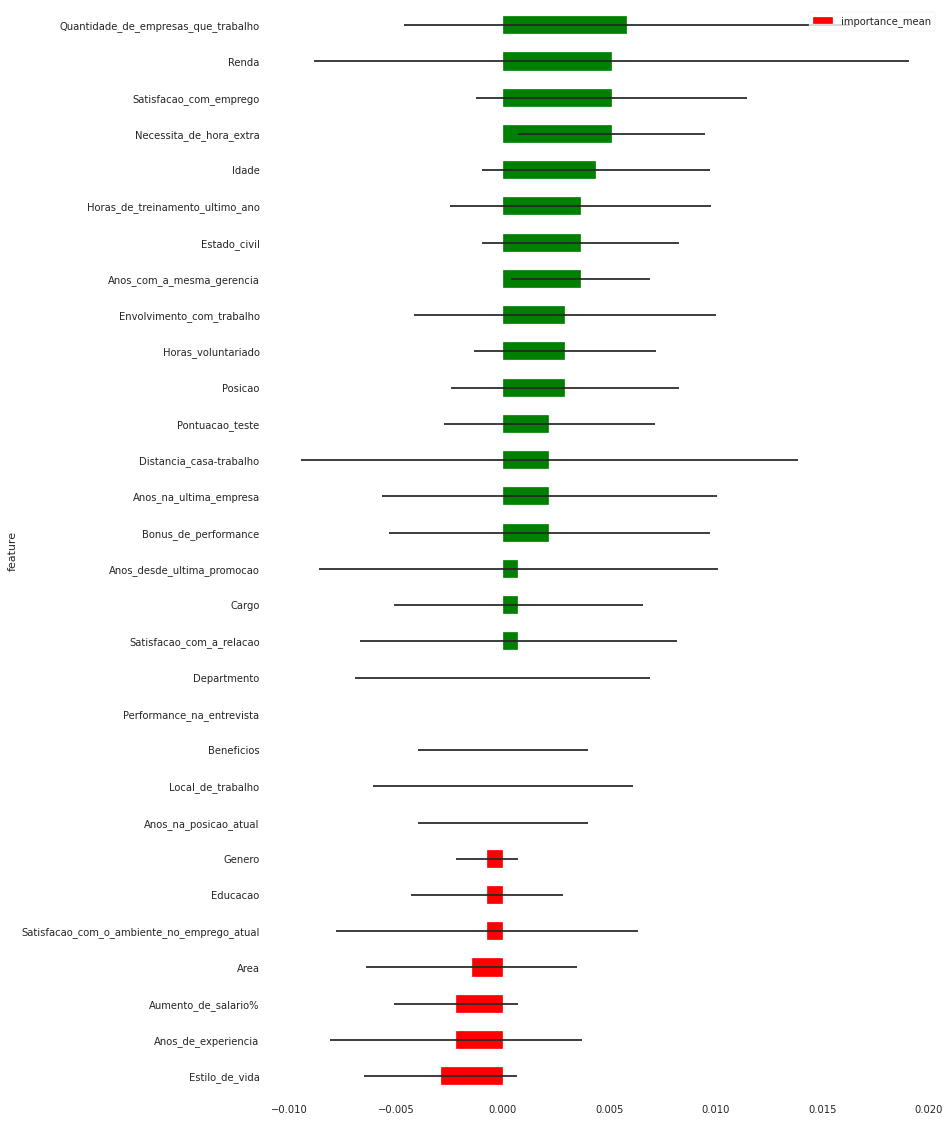

In [10]:
# define the validation scheme
cv = KFold(n_splits=5, shuffle=False, random_state=42)

# define the binary target and the features
dataset = Dataset(df=dados, target="Contratar", features=[col for col in dados.columns if col != 'Contratar'])

# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, cv=cv, scoring="neg_mean_absolute_error")

# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

# plot the means and standard deviations of the importances
plot_importance(importance_df, figsize=(12, 20))

# Parte 06. Modelagem Preditiva
> Nesta fase estarei construindo os modelos preditivos
> Vou utilizar apenas o algoritmo XGB Classifier neste notebook

### XGBoost versão 01
> - Rodando a primeira versao com todas as features criadas
> - Usando train_test_split com 30% dos dados para testes
> - Sem aplicar nenhuma técnica de balanceamento

Acurácia: 89.78%
Sensibilidade : 0.35294117647058826
Especificidade : 0.975


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       240
           1       0.67      0.35      0.46        34

    accuracy                           0.90       274
   macro avg       0.79      0.66      0.70       274
weighted avg       0.88      0.90      0.88       274



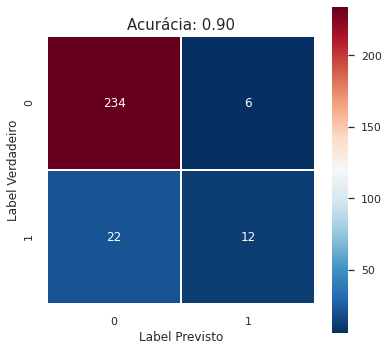

In [16]:
# Vamos armazenar 'Contratar' no rótulo (y) e o restante das colunas em X
X = dados.drop(['Contratar'], axis = 1)
y = dados['Contratar']

# Aplicando a mesma escala nos dados
X = MinMaxScaler().fit_transform(X)

# Separação dos dados em um conjunto de treino e um conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo
modelo_xgb_v1 = XGBClassifier()

# Treinando o modelo
modelo_xgb_v1.fit(X_train, y_train)

# Fazendo previsões
xgb_y_pred = modelo_xgb_v1.predict(X_test)
previsoes = [round(value) for value in xgb_y_pred]

# Avaliando as previsões
xgb_score_v1 = accuracy_score(y_test, previsoes)
print("Acurácia: %.2f%%" % (xgb_score_v1 * 100.0))

# Cria a matriz de confusão
conf_matriz_xgb = confusion_matrix(y_test, xgb_y_pred)
    
# Calcula especificidade e sensibilidade
speci_xgb = conf_matriz_xgb[0,0] / (conf_matriz_xgb[0,0] + conf_matriz_xgb[0,1])
sensi_xgb = conf_matriz_xgb[1,1] / (conf_matriz_xgb[1,0] + conf_matriz_xgb[1,1])

# Print
print('Sensibilidade :', sensi_xgb)
print('Especificidade :', speci_xgb)
print('\n')

# Matriz de Confusão gráfica
sns.set(rc={'figure.figsize':(6, 6)})
sns.heatmap(conf_matriz_xgb, 
            annot = True, 
            fmt = ".0f", 
            linewidths = .5, 
            square = True, 
            cmap = 'RdBu_r')

# Labels e Títulos
plt.ylabel('Label Verdadeiro')
plt.xlabel('Label Previsto')
plt.title('Acurácia: {:.2f}'.format(xgb_score_v1), size = 15)

# Relatório de Classificação
print(classification_report(y_test, xgb_y_pred))

### XGB versao 02
> - Rodando a segunda versao com todas as features
> - Usando train_test_split com 30% dos dados para testes
> - Aplicando técnica de balanceamento

Acurácia: 93.01%
Sensibilidade : 0.9380530973451328
Especificidade : 0.9227642276422764


              precision    recall  f1-score   support

           0       0.94      0.92      0.93       246
           1       0.92      0.94      0.93       226

    accuracy                           0.93       472
   macro avg       0.93      0.93      0.93       472
weighted avg       0.93      0.93      0.93       472



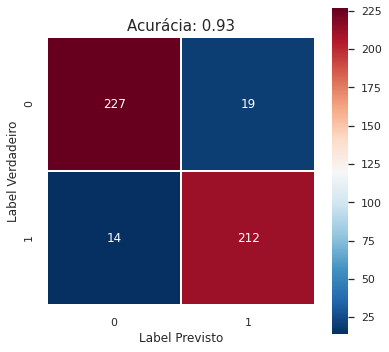

In [17]:
# Vamos armazenar 'Contratar' no rótulo (y) e o restante das colunas em X
X = dados.drop(['Contratar'], axis = 1)
y = dados['Contratar']

# Aplicando a funcao SMOTE
sm = SMOTE(random_state=0)
X, y = sm.fit_sample(X, y)

# Aplicando a mesma escala nos dados
X = MinMaxScaler().fit_transform(X)

# Separação dos dados em um conjunto de treino e um conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo
modelo_xgb_v2 = XGBClassifier()

# Treinando o modelo
modelo_xgb_v2.fit(X_train, y_train)

# Fazendo previsões
xgb_y_pred = modelo_xgb_v2.predict(X_test)
previsoes = [round(value) for value in xgb_y_pred]

# Avaliando as previsões
xgb_score_v2 = accuracy_score(y_test, previsoes)
print("Acurácia: %.2f%%" % (xgb_score_v2 * 100.0))

# Cria a matriz de confusão
conf_matriz_xgb = confusion_matrix(y_test, xgb_y_pred)
    
# Calcula especificidade e sensibilidade
speci_xgb = conf_matriz_xgb[0,0] / (conf_matriz_xgb[0,0] + conf_matriz_xgb[0,1])
sensi_xgb = conf_matriz_xgb[1,1] / (conf_matriz_xgb[1,0] + conf_matriz_xgb[1,1])

# Print
print('Sensibilidade :', sensi_xgb)
print('Especificidade :', speci_xgb)
print('\n')

# Matriz de Confusão gráfica
sns.set(rc={'figure.figsize':(6, 6)})
sns.heatmap(conf_matriz_xgb, 
            annot = True, 
            fmt = ".0f", 
            linewidths = .5, 
            square = True, 
            cmap = 'RdBu_r')

# Labels e Títulos
plt.ylabel('Label Verdadeiro')
plt.xlabel('Label Previsto')
plt.title('Acurácia: {:.2f}'.format(xgb_score_v2), size = 15)

# Relatório de Classificação
print(classification_report(y_test, xgb_y_pred))

# Parte 07. Avaliação do Desempenho dos Modelos
> Nesta fase estarei comparando cada versao do modelo Random Forest

In [18]:
# Prepara a lista de resultados
metricas = [(xgb_score_v1),(xgb_score_v2)]

# Cria o dataframe
df_metricas = pd.DataFrame(metricas, 
                           columns = ['Accuracy'], 
                           index = ['Versao 01', 'Versao 02']) 

# Visualiza o resultado
df_metricas

,Accuracy
Versao 01,0.897810
Versao 02,0.930085
